In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# split dataset into training and test set while loading it
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# printing the shape(size) of training and test dataset
print("Shape of independant variables of training data is: {}".format(x_train.shape))
print("Shape of dependant variables of training data is: {}".format(y_train.shape))
print("Shape of independant variables of test data is: {}".format(x_test.shape))
print("Shape of dependant variable of test data is: {}".format(y_test.shape))

Shape of independant variables of training data is: (60000, 28, 28)
Shape of dependant variables of training data is: (60000,)
Shape of independant variables of test data is: (10000, 28, 28)
Shape of dependant variable of test data is: (10000,)


First five training images-



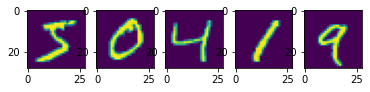

In [4]:
# first five training images using imshow function from matplotlib
print("First five training images-\n")
fig,sb = plt.subplots(1, 5) # making coordinates of 1*5 for images to fit
for i in range(0,5):
    sb[i].imshow(x_train[i])

In [5]:
# converting train features and target to dataframe

# converting x_train from 3D to 2D: 
# taking each picture of 28*28 pixels and flattening it row wise one after the other.
# Thus now we have 60,000 images(rows) each of whose 784 columns are the 28*28 pixels
xTrain = pd.DataFrame(np.array(x_train).reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])) 

yTrain = pd.DataFrame(data=y_train,columns=['label']) # reading y_Train into a dataframe and renaming its column

df_x_train = pd.concat([xTrain, yTrain],axis=1) # making the two dataframe as one
df_x_train.head() #visualizing first 5 rows of newly created dataframe


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [6]:
# converting train features and target to dataframe

# converting x_test from 3D to 2D: 
# taking each picture of 28*28 pixels and flattening it row wise one after the other.
# Thus now we have 60,000 images(rows) each of whose 784 columns are the 28*28 pixels
xTest = pd.DataFrame(np.array(x_test).reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])) 

yTest = pd.DataFrame(data=y_test,columns=['test label']) #reading y_test to a dataframe and renaming its column

/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


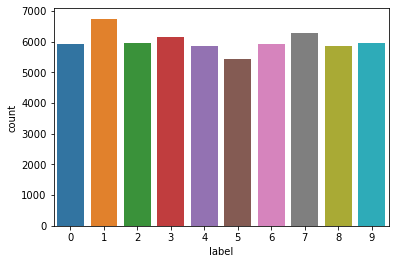

In [7]:
# visualizing the classes
sns.countplot(df_x_train['label'])
plt.show()

In [8]:
# scaling the train features as pixel size varies from 0 to 255
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.fit_transform(xTest)

In [9]:
from sklearn import svm

svc = svm.SVC(kernel = 'linear')
svc.fit(xTrainScaled,yTrain) # fitting linear svc model

/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [10]:
# predicting for test set
yPred = svc.predict(xTestScaled)

In [11]:
yPred[:20] # displaying first 20 predicted results

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 2, 4],
      dtype=uint8)

In [12]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(yTest,yPred)*100
print("Accuracy of SVC on mnist test data is: ", round(accuracy,2))

Accuracy of SVC on mnist test data is:  92.8


In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yTest, yPred) # generating confusion matrix
cm_df = pd.DataFrame(cm) # converting to dataframe for better visualization
cm_df

,0,1,2,3,4,5,6,7,8,9
0,953,0,6,2,1,8,6,2,1,1
1,0,1118,7,2,0,1,2,1,4,0
2,9,12,956,11,9,4,5,5,18,3
3,7,1,15,940,0,17,1,6,19,4
4,3,2,18,1,927,0,3,6,3,19
5,7,6,7,40,5,791,12,1,20,3
6,14,3,17,1,9,19,892,0,3,0
7,2,8,23,14,11,2,0,945,2,21
8,11,7,10,29,8,23,8,6,860,12
9,9,7,6,11,38,5,0,23,12,898


In [14]:
from sklearn.metrics import f1_score

f1_score = f1_score(yTest, yPred, average=None) # calculating f1_score using built in function

In [15]:
# function to calculate f1_score from scratch using confusion matrix
def F1_score(confusion_matrix):
    
    classes = list(confusion_matrix.columns)
    f1_score = []
    tp = []
    fp = []
    fn = []
    
    for i in classes:
        tp.append(confusion_matrix[i][i])
        
        fp_val = 0
        for j in classes:
            if(i!=j):
                fp_val += confusion_matrix[i][j]
        fp.append(fp_val)
        
        fn_val = 0
        for j in classes:
            if(i!=j):
                fn_val += confusion_matrix[j][i]
        fn.append(fn_val)
    
    for i in classes:
        tp[i] = 2*tp[i]
        f1_score.append(tp[i]/(tp[i] + fp[i] + fn[i]))
    
    return f1_score
    

In [16]:
# converting built in f1_score to a dataframe
df1 = pd.DataFrame(f1_score)
df1 = df1.T
df1 = df1.set_axis(['F1_Score using inbuilt function'], axis=0)

# converting F1_score() return value to a dataframe
df2 = pd.DataFrame(F1_score(cm_df))
df2
df2 = df2.T
df2 = df2.set_axis(['F1_Score using user function'], axis=0)

# concatinating the 2 f1_scores calculated for each class
f1_score_df = pd.concat([df1,df2],axis = 0)
f1_score_df

,0,1,2,3,4,5,6,7,8,9
F1_Score using inbuilt function,0.955388,0.972597,0.911779,0.912179,0.931658,0.897843,0.945416,0.934256,0.897704,0.911675
F1_Score using user function,0.955388,0.972597,0.911779,0.912179,0.931658,0.897843,0.945416,0.934256,0.897704,0.911675


In [17]:
# performing a train test split again on the training dataset and using the newly formed train test split for svm rbf and polynomial kernel due to heave computation with 60k instances
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xTrainScaled,yTrain,test_size=0.30)
print("Shape of new train set of features: " ,X_train.shape)
print("Shape of new test set of features: " ,X_test.shape)
print("Shape of new train set target valriable: " ,y_train.shape)
print("Shape of new test set of target variables: " ,y_test.shape)


Shape of new train set of features:  (42000, 784)
Shape of new test set of features:  (18000, 784)
Shape of new train set target valriable:  (42000, 1)
Shape of new test set of target variables:  (18000, 1)


In [18]:
# building non-linear models with the RBF kernel

svc_rbf = svm.SVC(kernel = 'rbf')
svc_rbf.fit(X_train,y_train) # fitting linear svc model
yPred_rbf = svc_rbf.predict(X_test) # predicting for test set

/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
# accuracy of svc using rbf kernel

acc_rbf = accuracy_score(y_test,yPred_rbf)*100
print("Accuracy of SVC on mnist test data using rbf kernel is: ", round(acc_rbf,2))

Accuracy of SVC on mnist test data using rbf kernel is:  96.06


In [20]:
# building non-linear model with the polynomial kernel

svc_poly = svm.SVC(kernel = 'poly')
svc_poly.fit(X_train,y_train) # fitting linear svc model
yPred_poly = svc_poly.predict(X_test) # predicting for test set

/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
# accuracy of svc using polynomial kernel

acc_poly = accuracy_score(y_test,yPred_poly)*100
print("Accuracy of SVC on mnist test data using polynomial kernel is: ", round(acc_poly,2))

Accuracy of SVC on mnist test data using polynomial kernel is:  95.53


In [22]:
# applying PCA before performing GridSearchCV to reduce the heavy computation
from sklearn.decomposition import PCA

components = 0.75
pca = PCA(n_components = components) # keeping desired explained variance as 75%
pca.fit(X_train) # perform PCA on the scaled & split train data

PCA(n_components=0.75)

Text(0, 0.5, 'Explained variance (%)')

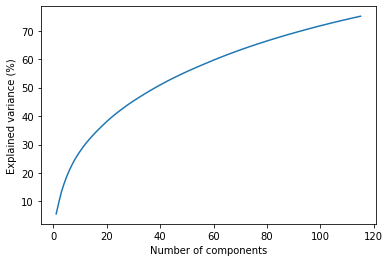

In [23]:
# plotting a scree plot

components = len(pca.explained_variance_ratio_)

plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

# approximately 120 features explain 75% of the variance

In [24]:
# transforming X_train & X_test to a lower dimensionality using PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Shape of train set of features after PCA: " ,X_train_pca.shape)
print("Shape of test set of features after PCA: " ,X_test_pca.shape)

Shape of train set of features after PCA:  (42000, 115)
Shape of test set of features after PCA:  (18000, 115)


In [25]:
from sklearn.model_selection import GridSearchCV

c_vals = [0.5,10] # set of possible C values for hyperparameter tuning
        
gamma_vals = [0.01,0.5] # set of possible gamma values for hyperparameter tuning

param_grid = {'C' : c_vals, 'gamma' : gamma_vals}

clf = GridSearchCV(svm.SVC(kernel = 'rbf'),param_grid,cv = 2) # having 2 fold cross validation

clf.fit(X_train_pca,y_train)

clf_df = pd.DataFrame(clf.cv_results_) # converting results of GridSearchCV to a dataframe
clf_df[['param_C','param_gamma','mean_test_score']] # displaying imp columns


/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

,param_C,param_gamma,mean_test_score
0,0.5,0.01,0.871738
1,0.5,0.5,0.111643
2,10,0.01,0.916452
3,10,0.5,0.168310


In [26]:
print(clf.best_score_) # best scores 
print(clf.best_params_) # best hyperparameter values 

0.916452380952381
{'C': 10, 'gamma': 0.01}


In [27]:
# building final model with chosen hyperparameters

model = svm.SVC(kernel = 'rbf', C = 10, gamma = 0.01)
model.fit(X_train_pca,y_train) # fitting the model
y_predicted = model.predict(X_test_pca) # predicting for test set

/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
# accuracy of model

accuracy = accuracy_score(y_test,y_predicted)*100
print("Accuracy of SVC on mnist data using rbf kernel and using best parameters from GridSearchCV: "
      , round(accuracy,1))

Accuracy of SVC on mnist data using rbf kernel and using best parameters from GridSearchCV:  93.7


In [29]:
# confusion matrix

confsn_mat = confusion_matrix(y_test, y_predicted) # generating confusion matrix
confsn_mat_df = pd.DataFrame(confsn_mat) # converting to dataframe for better visualization
confsn_mat_df

,0,1,2,3,4,5,6,7,8,9
0,1738,1,56,2,1,3,6,1,2,1
1,3,2019,20,1,0,0,1,4,4,1
2,3,0,1759,2,3,1,0,3,3,2
3,1,1,139,1636,0,12,0,10,19,4
4,1,3,122,0,1611,0,4,3,1,13
5,1,0,72,19,1,1521,9,0,4,1
6,2,2,112,0,1,7,1697,0,6,0
7,0,8,122,3,6,0,0,1633,2,5
8,1,4,91,13,0,11,4,5,1585,3
9,2,3,101,9,13,2,1,27,7,1664


In [40]:
# storing the support vectors of previous model as new train set

X_train_new = model.support_vectors_
X_train_new.shape

(19456, 115)

In [31]:
# taking the respective target values from the indices of support vectors to form the new y_train
temp = []
for i in model.support_:
    temp.append(y_train.iloc[i])
y_train_new = np.array(temp)

In [32]:
# building model with newly defined train set

model_new = svm.SVC(kernel = 'rbf', C = 10, gamma = 0.01)
model_new.fit(X_train_new,y_train_new) # fitting the model

/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, gamma=0.01)

In [33]:
y_train_pred_new = model_new.predict(X_train_new) # predicting for train set
y_pred_new = model_new.predict(X_test_pca) # predicting for test set

In [34]:
# accuracy of model

accuracy_train = accuracy_score(y_train_new,y_train_pred_new)*100
print("Accuracy of SVC on mnist train data using rbf kernel, best parameters from GridSearchCV and only the support vectors: "
      , accuracy_train)

# accuracy of 100% on training set shows that the model is overfitting
# this might be due to the reduction of data points due to heavy computation


Accuracy of SVC on mnist train data using rbf kernel, best parameters from GridSearchCV and only the support vectors:  100.0


In [39]:
# accuracy of model

accuracy_test = accuracy_score(y_test,y_pred_new)*100
print("Accuracy of SVC on mnist test data using rbf kernel, best parameters from GridSearchCV and only the support vectors: "
      , round(accuracy_test,1))


Accuracy of SVC on mnist test data using rbf kernel, best parameters from GridSearchCV and only the support vectors:  93.7


The accuracy using only support vectors as train set is exactly the same as using the entire train set (i.e. the X_train_pca train set). This is so because for an entire dataset its the support vectors which help in determining the best hyperplane in SVM which have the minimum fuctional margin from these support vectors. In SVM we always maximize the minimum functional margin hence support vectors become the deciding factors. Thus other instances wont play a part in deciding the hyperplane as long as the support vectors are in their place. Hence even with or without the other instances we got the same accuracy.